# Analyse einer Twitter-Abfrage zun Wort vegan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Achtung: Nehmt eure eigenen Pfade mit meinen wirds nicht funktionieren!**

In [2]:
# Laden der Dataframes 
## TW ....csv sind Tweets
## RT ...csv sind Retweets
tweets_df = pd.read_csv('../data/TW_vegan_2021-03-23.csv')
retweets_df = pd.read_csv('../data/RT_vegan_2021-03-23.csv')

### Zahl der twetter und ihrer tweets
Wieviele tweeter und retweeter sind in der Abfrage?

In [3]:
tweeter = tweets_df["user_name"].unique()
tweets = tweets_df["tweet_id"].unique()
tweet_fol_max = tweets_df["followers_count"].max()
tweet_fol_avg = tweets_df["followers_count"].mean()
tweet_fol_median = tweets_df["followers_count"].median()
tweet_friends_max = tweets_df["friends_count"].max()
tweet_favourite_median = tweets_df["favourite_count"].median()
tweet_favourite_max = tweets_df["favourite_count"].max()

print("tweeter" ,len(tweeter), "\n-> ihre tweets",len(tweets), "\n-> followers max", tweet_fol_max, "avg", tweet_fol_avg, 
      "median", tweet_fol_median,"\n-> friends max", tweet_friends_max, "\n-> gefällt mir max" ,tweet_favourite_max, "median", tweet_favourite_median)

tweeter 26 
-> ihre tweets 33 
-> followers max 5362233 avg 1120134.9393939395 median 319088.0 
-> friends max 89022 
-> gefällt mir max 8812 median 269.0


In [4]:
retweeter = retweets_df["user_name"].unique()
retweets = retweets_df["tweet_id"].unique()
retweets_median = retweets_df["retweet_count"].median()
retweets_quant_09 = retweets_df["retweet_count"].quantile(0.9)
retweets_max = retweets_df["retweet_count"].max()
retweet_fol_max = retweets_df["followers_count"].max()
retweets_fol_quant_09 = retweets_df["followers_count"].quantile(0.9)
retweet_friends_max = retweets_df["friends_count"].max()


print("retweeter" ,len(retweeter), "\n-> ihre retweets",len(retweets),
      "\n-> retweets Median",retweets_median," nur 10% haben mehr als" ,retweets_quant_09," retweets  - max", retweets_max,
      "\n-> followers max", retweet_fol_max," nur 10% haben mehr als ",retweets_fol_quant_09,"followers",
      "\n-> friends max", retweet_friends_max)

retweeter 381 
-> ihre retweets 405 
-> retweets Median 34.0  nur 10% haben mehr als 78.0  retweets  - max 88 
-> followers max 186652  nur 10% haben mehr als  4115.4000000000015 followers 
-> friends max 21467


In [5]:
# 1000 Gesammelte Tweets
## Primärschlüssel tweet_id
print(tweets_df.shape)
tweets_df.head(3)

(33, 18)


,Unnamed: 0,tweet_id,creation_date,full_text,mentions,entities_hashtags,user_name,user_screen_name,user_id,location,description,protected,followers_count,friends_count,profile_created_at,retweet_count,favourite_count,search_key
0,0,1374153315529990147,Tue Mar 23 00:17:35 +0000 2021,"@juliensolomita Wishing a very loud ""EH BEP BE...","['juliensolomita', 'juliensolomita']",[],Petco,Petco,17396566,NaN,We’re setting a new standard for pet health an...,False,179102,5602,Fri Nov 14 21:46:13 +0000 2008,653,8812,vegan
1,1,1373799900970938370,Mon Mar 22 00:53:15 +0000 2021,"""Good government"" is like a vegan wolverine.\n...",[],[],Spike Cohen,RealSpikeCohen,1204095351944368139,"Myrtle Beach, SC",2020 Libertarian Party Candidate for Vice Pres...,False,65469,216,Mon Dec 09 17:48:52 +0000 2019,279,1662,vegan
2,2,1373828026820136960,Mon Mar 22 02:45:00 +0000 2021,So I made a post on TT about how a lot of raci...,[],[],"Imani Barbarin, MAGC | Crutches&Spice ♿️",Imani_Barbarin,87371781,"Pennsylvania, USA",she/her Black girl magic+disabled pride |MA Gl...,False,92061,1188,Wed Nov 04 05:29:09 +0000 2009,163,1510,vegan


In [6]:
# Gesammelte Retweets auf obige Tweets
## Primärschlüssel tweet_id, Fremdschlüssel auf Tabelle TW..csv ist "RT_of_ID"
print(retweets_df.shape)
retweets_df.head(3)

(405, 19)


,Unnamed: 0,tweet_id,creation_date,full_text,mentions,entities_hashtags,user_name,user_screen_name,user_id,location,description,protected,followers_count,friends_count,profile_created_at,retweet_count,favourite_count,RT_of_ID,search_key
0,0,1374359031066759171,Tue Mar 23 13:55:02 +0000 2021,RT @CoryBooker: Republicans do like it. The Am...,['CoryBooker'],[],chloedancer,chloedancer,15367365,"Los Angeles, CA","Music=Joy, Joy=Music",False,1496,1586,Wed Jul 09 16:34:42 +0000 2008,68,0,1374058626751602689,vegan
1,1,1374235413452365825,Tue Mar 23 05:43:49 +0000 2021,RT @CoryBooker: Republicans do like it. The Am...,['CoryBooker'],[],joannehankinson,Jozie1958,1326753396016226305,"West Chester, OH","Fiancée, mom, Nana, Catholic liberal, Ohio Tra...",False,20,141,Thu Nov 12 05:07:31 +0000 2020,68,0,1374058626751602689,vegan
2,2,1374226633125736448,Tue Mar 23 05:08:55 +0000 2021,RT @CoryBooker: Republicans do like it. The Am...,['CoryBooker'],[],Karen B,kbscribe,46300449,North Jersey,A life in the making. How about you?,False,486,567,Thu Jun 11 03:11:30 +0000 2009,68,0,1374058626751602689,vegan


In [7]:
# Joinen der beiden DF mit Left-Join 
df = pd.merge(left=tweets_df, right=retweets_df, how='left', left_on='tweet_id', right_on='RT_of_ID')
df.head(2)

,Unnamed: 0_x,tweet_id_x,creation_date_x,full_text_x,mentions_x,entities_hashtags_x,user_name_x,user_screen_name_x,user_id_x,location_x,...,location_y,description_y,protected_y,followers_count_y,friends_count_y,profile_created_at_y,retweet_count_y,favourite_count_y,RT_of_ID,search_key_y
0,0,1374153315529990147,Tue Mar 23 00:17:35 +0000 2021,"@juliensolomita Wishing a very loud ""EH BEP BE...","['juliensolomita', 'juliensolomita']",[],Petco,Petco,17396566,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1373799900970938370,Mon Mar 22 00:53:15 +0000 2021,"""Good government"" is like a vegan wolverine.\n...",[],[],Spike Cohen,RealSpikeCohen,1204095351944368139,"Myrtle Beach, SC",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Welche columns kann ich auswerten?
df.columns

Index(['Unnamed: 0_x', 'tweet_id_x', 'creation_date_x', 'full_text_x',
       'mentions_x', 'entities_hashtags_x', 'user_name_x',
       'user_screen_name_x', 'user_id_x', 'location_x', 'description_x',
       'protected_x', 'followers_count_x', 'friends_count_x',
       'profile_created_at_x', 'retweet_count_x', 'favourite_count_x',
       'search_key_x', 'Unnamed: 0_y', 'tweet_id_y', 'creation_date_y',
       'full_text_y', 'mentions_y', 'entities_hashtags_y', 'user_name_y',
       'user_screen_name_y', 'user_id_y', 'location_y', 'description_y',
       'protected_y', 'followers_count_y', 'friends_count_y',
       'profile_created_at_y', 'retweet_count_y', 'favourite_count_y',
       'RT_of_ID', 'search_key_y'],
      dtype='object')

In [9]:
df.describe()

,Unnamed: 0_x,tweet_id_x,user_id_x,followers_count_x,friends_count_x,retweet_count_x,favourite_count_x,Unnamed: 0_y,tweet_id_y,user_id_y,followers_count_y,friends_count_y,retweet_count_y,favourite_count_y,RT_of_ID
count,415.000000,4.150000e+02,4.150000e+02,4.150000e+02,415.000000,415.000000,415.000000,405.000000,4.050000e+02,4.050000e+02,405.000000,405.000000,405.000000,405.0,4.050000e+02
mean,16.706024,1.373422e+18,2.901435e+15,1.049220e+06,10219.568675,44.706024,338.691566,202.000000,1.373582e+18,4.878017e+17,2249.246914,1507.330864,40.202469,0.0,1.373427e+18
std,8.377007,9.117210e+14,5.910672e+16,1.372192e+06,19238.824466,43.378743,717.078501,117.057678,8.682185e+14,5.656665e+17,10970.927939,2378.569987,21.943074,0.0,9.112641e+14
min,0.000000,1.371462e+18,9.890492e+06,2.230500e+04,90.000000,18.000000,35.000000,0.000000,1.371462e+18,1.414498e+07,0.000000,0.000000,18.000000,0.0,1.371462e+18
25%,10.000000,1.373210e+18,1.594760e+07,1.007160e+05,915.000000,21.000000,74.000000,101.000000,1.373625e+18,3.417106e+08,82.000000,181.000000,21.000000,0.0,1.373210e+18
50%,15.000000,1.373756e+18,2.295602e+07,3.190880e+05,5028.000000,34.000000,117.000000,202.000000,1.373936e+18,2.991097e+09,304.000000,505.000000,34.000000,0.0,1.373756e+18
75%,24.000000,1.374011e+18,3.923035e+08,1.081308e+06,7301.000000,52.000000,319.000000,303.000000,1.374118e+18,1.069808e+18,1277.000000,1628.000000,52.000000,0.0,1.374011e+18
max,32.000000,1.374153e+18,1.204095e+18,5.362233e+06,89022.000000,653.000000,8812.000000,404.000000,1.374363e+18,1.373988e+18,186652.000000,21467.000000,88.000000,0.0,1.374143e+18


In [10]:
# Eine beliebige Tweet ID samplen aus dem Retweet Dataframe
test_id = retweets_df.loc[0, 'RT_of_ID']

In [11]:
# Suchen der Tweet_ID im neuen DF müssten gleich viele SPalten sein wie im Retweets Dataframe, wenn nach gleicher ID gesucht wird
df[df['tweet_id_x'] == test_id].shape
df[df['tweet_id_x'] == test_id].head(2)

,Unnamed: 0_x,tweet_id_x,creation_date_x,full_text_x,mentions_x,entities_hashtags_x,user_name_x,user_screen_name_x,user_id_x,location_x,...,location_y,description_y,protected_y,followers_count_y,friends_count_y,profile_created_at_y,retweet_count_y,favourite_count_y,RT_of_ID,search_key_y
4,4,1374058626751602689,Mon Mar 22 18:01:20 +0000 2021,Republicans do like it. The American Rescue Pl...,[],[],Cory Booker,CoryBooker,15808765,"Newark, NJ",...,"Los Angeles, CA","Music=Joy, Joy=Music",False,1496.0,1586.0,Wed Jul 09 16:34:42 +0000 2008,68.0,0.0,1.374059e+18,vegan
5,4,1374058626751602689,Mon Mar 22 18:01:20 +0000 2021,Republicans do like it. The American Rescue Pl...,[],[],Cory Booker,CoryBooker,15808765,"Newark, NJ",...,"West Chester, OH","Fiancée, mom, Nana, Catholic liberal, Ohio Tra...",False,20.0,141.0,Thu Nov 12 05:07:31 +0000 2020,68.0,0.0,1.374059e+18,vegan


In [12]:
retweets_df[retweets_df['RT_of_ID'] == test_id].shape
retweets_df[retweets_df['RT_of_ID'] == test_id].head(2)

,Unnamed: 0,tweet_id,creation_date,full_text,mentions,entities_hashtags,user_name,user_screen_name,user_id,location,description,protected,followers_count,friends_count,profile_created_at,retweet_count,favourite_count,RT_of_ID,search_key
0,0,1374359031066759171,Tue Mar 23 13:55:02 +0000 2021,RT @CoryBooker: Republicans do like it. The Am...,['CoryBooker'],[],chloedancer,chloedancer,15367365,"Los Angeles, CA","Music=Joy, Joy=Music",False,1496,1586,Wed Jul 09 16:34:42 +0000 2008,68,0,1374058626751602689,vegan
1,1,1374235413452365825,Tue Mar 23 05:43:49 +0000 2021,RT @CoryBooker: Republicans do like it. The Am...,['CoryBooker'],[],joannehankinson,Jozie1958,1326753396016226305,"West Chester, OH","Fiancée, mom, Nana, Catholic liberal, Ohio Tra...",False,20,141,Thu Nov 12 05:07:31 +0000 2020,68,0,1374058626751602689,vegan


## Auswertung TW

In [13]:
# Defintion des Anteils
viele = 0.8


# Auwahl des Anteils
t_fol_viele = tweets_df['followers_count'].quantile(viele)
df_fol = tweets_df.loc[(tweets_df['followers_count'] >= t_fol_viele)].drop_duplicates("user_name").sort_values(by=['followers_count'], ascending=False)[['user_id','user_name','followers_count','retweet_count','favourite_count','friends_count']]
df_fol


,user_id,user_name,followers_count,retweet_count,favourite_count,friends_count
20,86254626,Preity G Zinta,5362233,168,6127,108
4,15808765,Cory Booker,4963061,68,550,89022
13,17243213,Recording Academy / GRAMMYs,3381516,20,244,19585
24,173195708,Nigella Lawson,2745127,88,862,915
16,15947602,Change.org,1590722,18,41,688


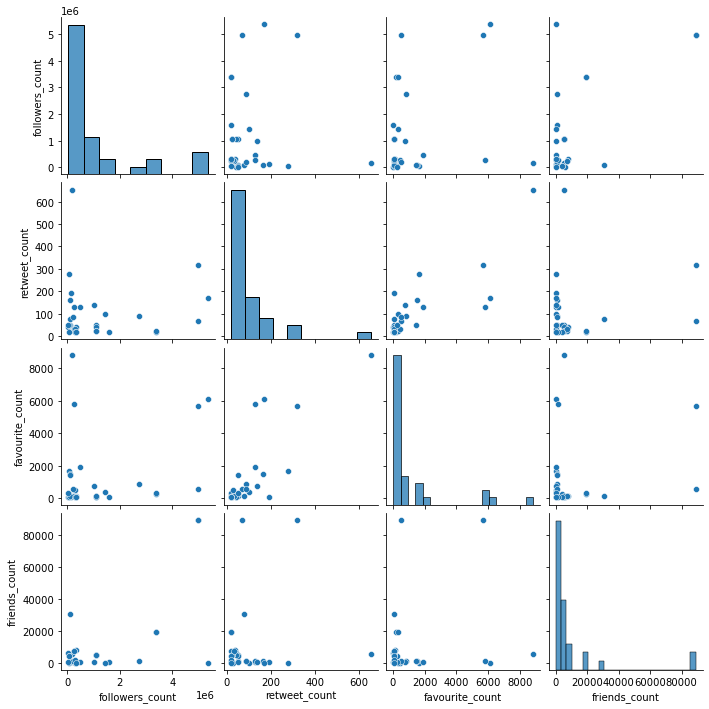

In [14]:
tweet_val = tweets_df[['followers_count','retweet_count','favourite_count','friends_count']]
ax = sns.pairplot(tweet_val)

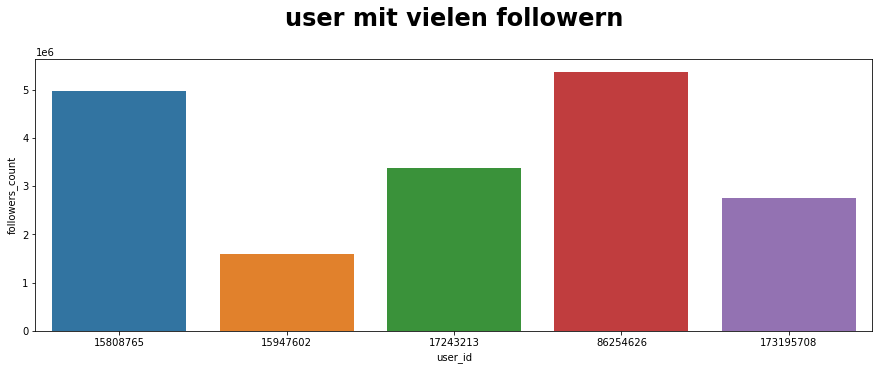

In [15]:
plt.figure(figsize=(15,5))
plt.title("user mit vielen followern", fontdict= { 'fontsize': 24, 'fontweight':'bold'}, y =1.1)
ax = sns.barplot(x="user_id", y="followers_count", data=df_fol)

### Wer hat am meisten favourits?

In [16]:
favour_viele = tweets_df['favourite_count'].quantile(viele)
df_favour = tweets_df.loc[(tweets_df['favourite_count'] >= favour_viele)].drop_duplicates("user_name").sort_values(by=['favourite_count'], ascending=False)[['user_id','user_name','followers_count','retweet_count','favourite_count','friends_count']]
df_favour

,user_id,user_name,followers_count,retweet_count,favourite_count,friends_count
0,17396566,Petco,179102,653,8812,5602
20,86254626,Preity G Zinta,5362233,168,6127,108
26,32184345,Nicola Coughlan,265865,131,5785,1365
22,15808765,Cory Booker,4962621,317,5686,89018
5,302111485,Enes Kanter,472937,128,1904,307
1,1204095351944368139,Spike Cohen,65469,279,1662,216
2,87371781,"Imani Barbarin, MAGC | Crutches&Spice ♿️",92061,163,1510,1188


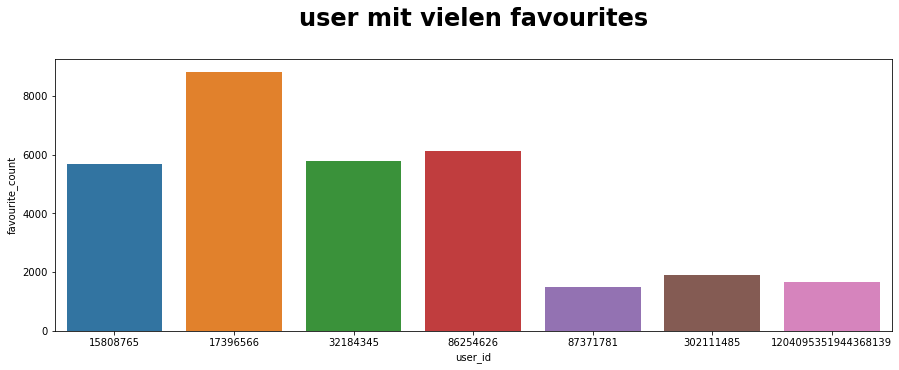

In [17]:
plt.figure(figsize=(15,5))
plt.title("user mit vielen favourites", fontdict= { 'fontsize': 24, 'fontweight':'bold'}, y =1.1)
ax = sns.barplot(x="user_id", y="favourite_count", data=df_favour)

In [18]:
t_ret_viele = tweets_df['retweet_count'].quantile(viele)
df_ret = tweets_df.loc[(tweets_df['retweet_count'] >= t_ret_viele)].drop_duplicates("user_name").sort_values(by=['retweet_count'], ascending=False)[['user_id','user_name','followers_count','retweet_count','favourite_count','friends_count']]
df_ret

,user_id,user_name,followers_count,retweet_count,favourite_count,friends_count
0,17396566,Petco,179102,653,8812,5602
22,15808765,Cory Booker,4962621,317,5686,89018
1,1204095351944368139,Spike Cohen,65469,279,1662,216
3,1245158946,The Social,122376,191,77,515
20,86254626,Preity G Zinta,5362233,168,6127,108
2,87371781,"Imani Barbarin, MAGC | Crutches&Spice ♿️",92061,163,1510,1188
27,40851965,Stella McCartney,998416,140,750,580


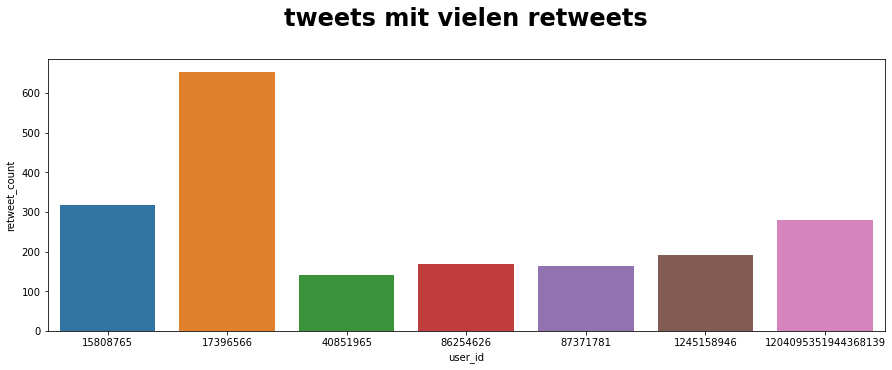

In [19]:
plt.figure(figsize=(15,5))
plt.title("tweets mit vielen retweets", fontdict= { 'fontsize': 24, 'fontweight':'bold'}, y =1.1)
ax = sns.barplot(x="user_id", y="retweet_count", data=df_ret)

### Wer hat am meisten friends?¶

In [20]:
friends_viele = tweets_df['friends_count'].quantile(viele)
df_friends = tweets_df.loc[(tweets_df['friends_count'] >= friends_viele)].drop_duplicates("user_name").sort_values(by=['friends_count'], ascending=False)[['user_id','user_name','followers_count','retweet_count','favourite_count','friends_count']]
df_friends

,user_id,user_name,followers_count,retweet_count,favourite_count,friends_count
4,15808765,Cory Booker,4963061,68,550,89022
25,357584312,PETA UK,100716,78,103,30480
13,17243213,Recording Academy / GRAMMYs,3381516,20,244,19585
6,22956018,jann arden,335131,40,134,7907
14,21754399,The Vegan Society,238007,22,99,7301


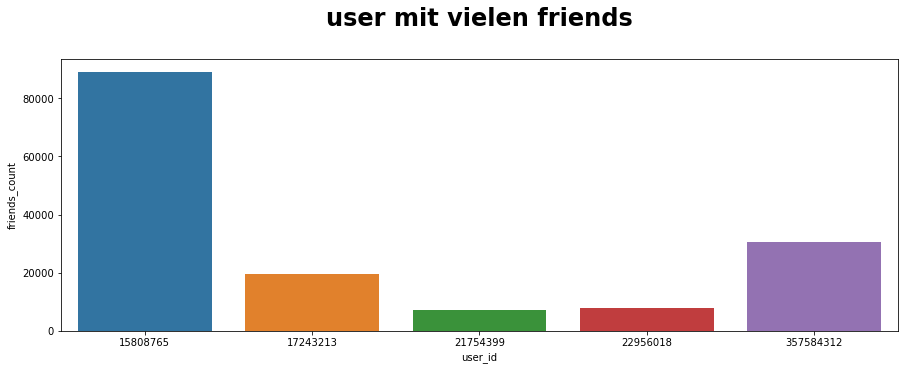

In [21]:
plt.figure(figsize=(15,5))
plt.title("user mit vielen friends", fontdict= { 'fontsize': 24, 'fontweight':'bold'}, y =1.1)
ax = sns.barplot(x="user_id", y="friends_count", data=df_friends)

## Auswertung RT

In [22]:
retweets_val = retweets_df[['followers_count','retweet_count','friends_count']]

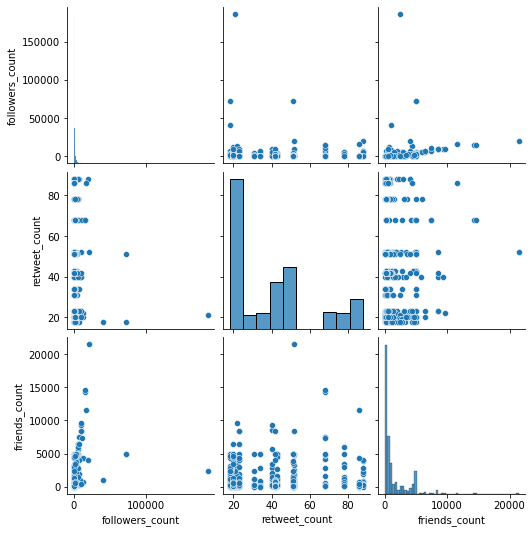

In [23]:
sns.set_context(font_scale=0.05)  
ax = sns.pairplot(retweets_val)

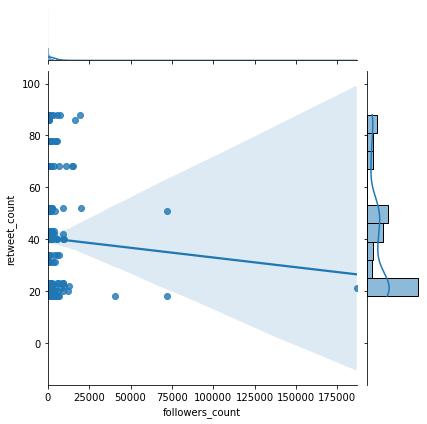

In [24]:
ax = sns.jointplot(x="followers_count", y="retweet_count", data=retweets_df, kind="reg")

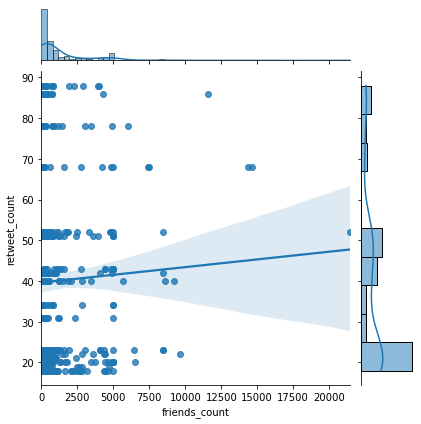

In [25]:

ax = sns.jointplot(x="friends_count", y="retweet_count", data=retweets_df, kind="reg")

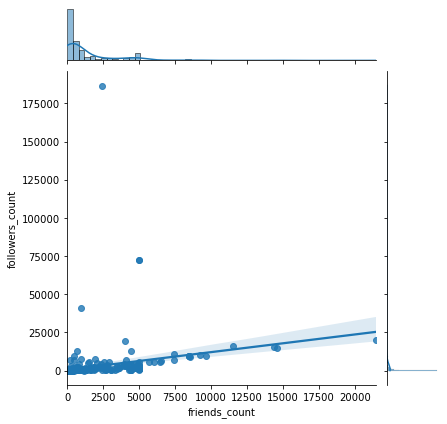

In [26]:
sns.jointplot(x="friends_count", y="followers_count", data=retweets_df, kind="reg");

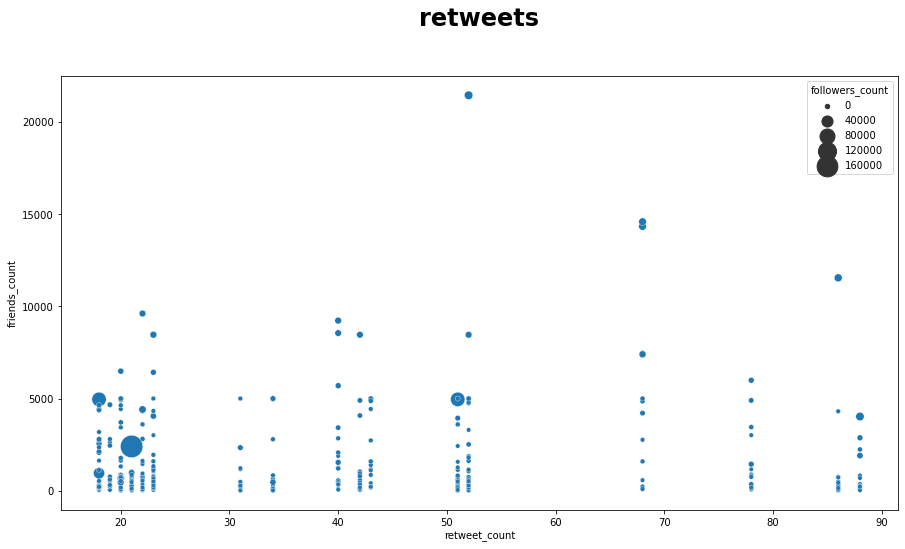

In [27]:
plt.figure(figsize=(15,8))
plt.title("retweets", fontdict= { 'fontsize': 24, 'fontweight':'bold'}, y =1.1)
sns.set_context(font_scale=2)  
ax = sns.scatterplot(data=retweets_df, x="retweet_count", y="friends_count", size="followers_count", sizes = (20,500))

## Auswertung df

In [28]:
df_val = df[['followers_count_x','retweet_count_x','friends_count_x',  'followers_count_y','retweet_count_y','friends_count_y']]

### Gibt es tweeter, die auch retweeter sind?

In [29]:
subsetdf = df[df['user_id_x'].isin(['user_id_y']) ]
subsetdf

,Unnamed: 0_x,tweet_id_x,creation_date_x,full_text_x,mentions_x,entities_hashtags_x,user_name_x,user_screen_name_x,user_id_x,location_x,...,location_y,description_y,protected_y,followers_count_y,friends_count_y,profile_created_at_y,retweet_count_y,favourite_count_y,RT_of_ID,search_key_y


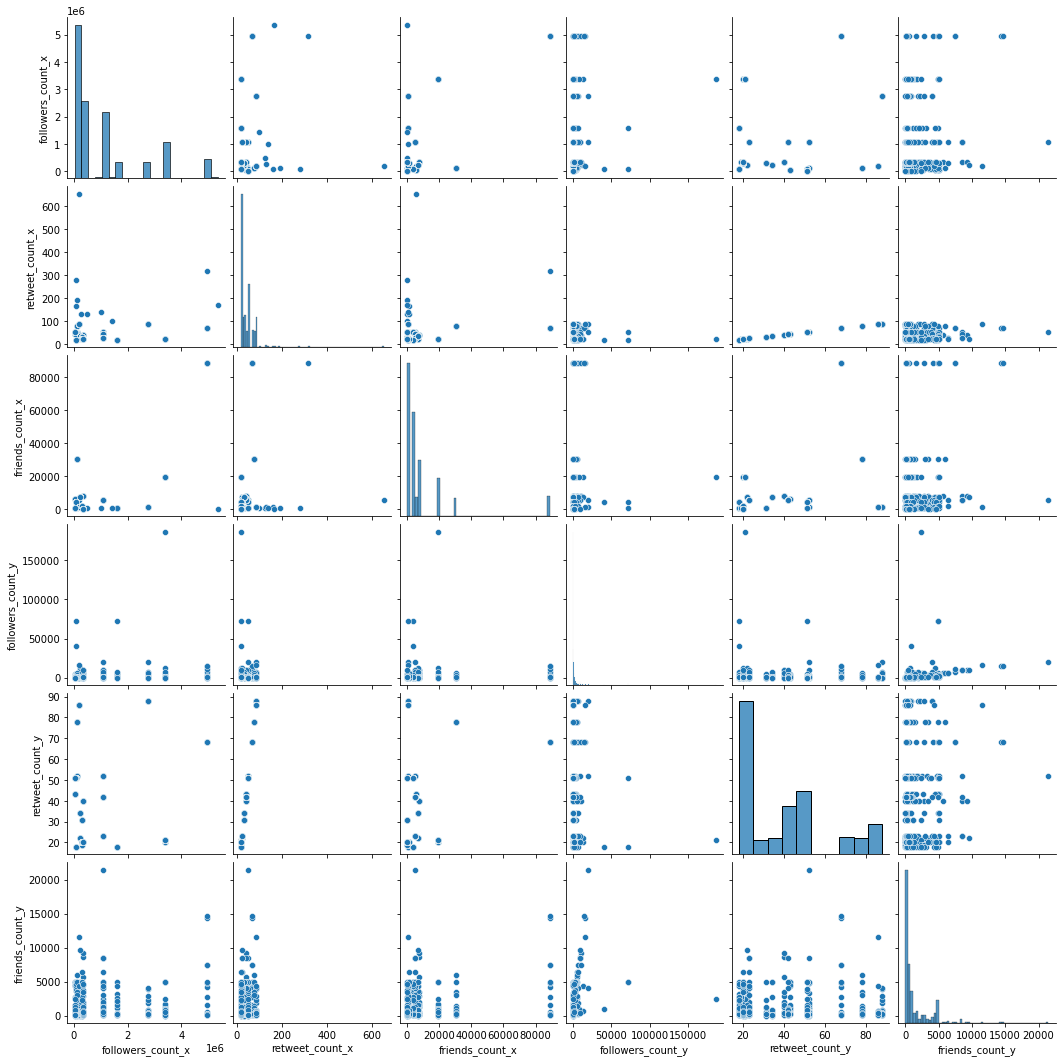

In [30]:
sns.set_context(font_scale= 0.1)  
ax = sns.pairplot(df_val)